<a href="https://colab.research.google.com/github/yasmeenha/bigdata/blob/main/vggpretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from shutil import copyfile
import pandas as pd
import IPython.display as display
import numpy as np
import os,random
import matplotlib.pyplot as plt
!pip install tensorflow
from tensorflow.keras.utils import load_img
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.11.0


In [ ]:
dir(os)

['CLD_CONTINUED',
 'CLD_DUMPED',
 'CLD_EXITED',
 'CLD_KILLED',
 'CLD_STOPPED',
 'CLD_TRAPPED',
 'DirEntry',
 'EX_CANTCREAT',
 'EX_CONFIG',
 'EX_DATAERR',
 'EX_IOERR',
 'EX_NOHOST',
 'EX_NOINPUT',
 'EX_NOPERM',
 'EX_NOUSER',
 'EX_OK',
 'EX_OSERR',
 'EX_OSFILE',
 'EX_PROTOCOL',
 'EX_SOFTWARE',
 'EX_TEMPFAIL',
 'EX_UNAVAILABLE',
 'EX_USAGE',
 'F_LOCK',
 'F_OK',
 'F_TEST',
 'F_TLOCK',
 'F_ULOCK',
 'GRND_NONBLOCK',
 'GRND_RANDOM',
 'GenericAlias',
 'MFD_ALLOW_SEALING',
 'MFD_CLOEXEC',
 'MFD_HUGETLB',
 'MFD_HUGE_16GB',
 'MFD_HUGE_16MB',
 'MFD_HUGE_1GB',
 'MFD_HUGE_1MB',
 'MFD_HUGE_256MB',
 'MFD_HUGE_2GB',
 'MFD_HUGE_2MB',
 'MFD_HUGE_32MB',
 'MFD_HUGE_512KB',
 'MFD_HUGE_512MB',
 'MFD_HUGE_64KB',
 'MFD_HUGE_8MB',
 'MFD_HUGE_MASK',
 'MFD_HUGE_SHIFT',
 'Mapping',
 'MutableMapping',
 'NGROUPS_MAX',
 'O_ACCMODE',
 'O_APPEND',
 'O_ASYNC',
 'O_CLOEXEC',
 'O_CREAT',
 'O_DIRECT',
 'O_DIRECTORY',
 'O_DSYNC',
 'O_EXCL',
 'O_LARGEFILE',
 'O_NDELAY',
 'O_NOATIME',
 'O_NOCTTY',
 'O_NOFOLLOW',
 'O_NONBLOCK'

In [ ]:
os.getcwd()

'/content'

In [ ]:
import socket
hostname = socket.gethostname()
ip_address = socket.gethostbyname(hostname)
print(ip_address)

172.28.0.12


In [ ]:
!git clone https://github.com/KarthikGandu/Cats_Dogs_data.git

Cloning into 'Cats_Dogs_data'...
remote: Enumerating objects: 37510, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 37510 (delta 43), reused 36 (delta 7), pack-reused 37414
Receiving objects: 100% (37510/37510), 812.51 MiB | 16.62 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (50016/50016), done.


In [ ]:
IMAGE_HEIGHT=128
IMAGE_WIDTH=128
BATCH_SIZE=64

In [ ]:
def get_pathframe(path):
  filenames = os.listdir(path)
  categories = []
  paths=[]
  for filename in filenames:
    paths.append(path+filename)
    category = filename.split('.')[0]
    if category == 'dog':
      categories.append(1)
    else:
      categories.append(0)
  df= pd.DataFrame({
      'filename': filenames,
      'label': categories
  })
  return df

In [ ]:
df=get_pathframe("/content/Cats_Dogs_data/dataset/dataset")
df.sample(5)

,filename,label
3584,dog.6449.jpg,1
1202,cat.11935.jpg,0
3328,cat.5418.jpg,0
2430,dog.1730.jpg,1
22493,dog.7307.jpg,1


<Axes: >

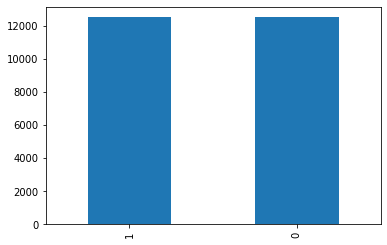

In [ ]:
df['label'].value_counts().plot.bar()

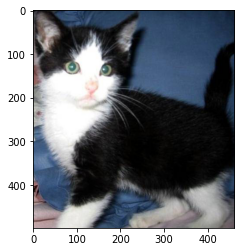

In [ ]:
filenames = os.listdir("/content/Cats_Dogs_data/dataset/dataset")
sample = random.choice(filenames)
image = load_img("/content/Cats_Dogs_data/dataset/dataset/"+sample)
plt.imshow(image)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 1
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,977,857
Trainable params: 7,342,593
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
type(pre_trained_model.layers)

list

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 1
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers:
  print(layer)
    
print("Is not transfer learning!")
for layer in pre_trained_model.layers[:15]:
  print(layer)

print("Is ransfer learning!")
for layer in pre_trained_model.layers[15:]:
     print(layer)
    
# last_layer = pre_trained_model.get_layer('block5_pool')
# last_output = last_layer.output
    
# # Flatten the output layer to 1 dimension
# x = GlobalMaxPooling2D()(last_output)
# # Add a fully connected layer with 512 hidden units and ReLU activation
# x = Dense(512, activation='relu')(x)
# # Add a dropout rate of 0.5
# x = Dropout(0.5)(x)
# # Add a final sigmoid layer for classification
# x = layers.Dense(1, activation='sigmoid')(x)

# model = Model(pre_trained_model.input, x)

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
#               metrics=['accuracy'])

# model.summary()

Is not transfer learning!
Is ransfer learning!


In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, 
    directory="/content/Cats_Dogs_data/dataset/dataset", 
    x_col='filename',
    y_col='label',
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 22500 validated image filenames.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/Cats_Dogs_data/dataset/dataset", 
    x_col='filename',
    y_col='label',
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False
)

Found 2500 validated image filenames.


Found 1 validated image filenames.


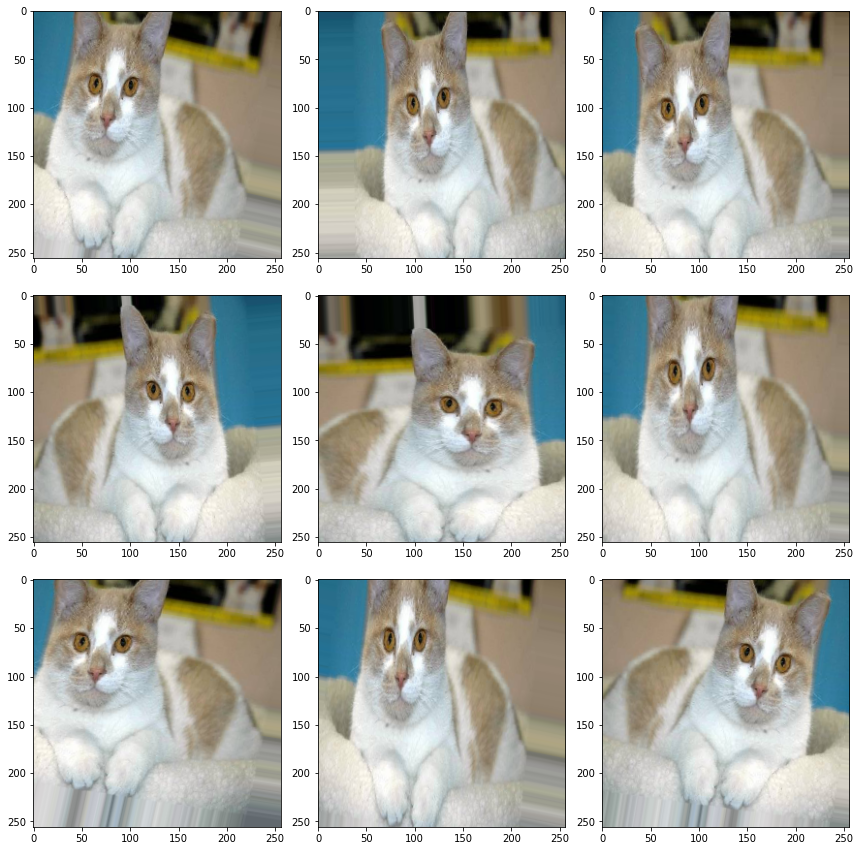

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
     "/content/Cats_Dogs_data/dataset/dataset", 
    x_col='filename',
    y_col='label',
    class_mode='raw'
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
# fine-tune the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate/batch_size)

1407/1407 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.8690 

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate/batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

In [ ]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    # axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    # axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

NameError: ignored

In [ ]:
#validation_generator.reset()
Y_val = validate_df['label']
y_pred =  model.predict(validation_generator)

In [ ]:
Y_val[0:5]

In [ ]:
y_pred[0:5]

In [ ]:
threshold = 0.5
y_final = np.where(y_pred > threshold,1,0)

In [ ]:
y_final.size

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val, y_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_val, y_final, target_names=['0','1'])

print(report)

In [ ]:
test_filenames = os.listdir("../input/test1/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# New Section

# New Section

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../input/test1/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)
See predicted result

In [ ]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../input/test1/test1/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()